<a href="https://colab.research.google.com/github/Dplatina/TIL/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B5%B0%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 0. 가설 : 코로나 이전 / 이후의 데이터를 군집화 가능한가

## 연습 분석: 이동량 데이터와 확진자 데이터로 오미크론 분리

### 전국 이동량 데이터 가공

In [3]:
# 전국 이동량 합계
filepath = '/content/drive/MyDrive/Multicampus/Project01/moving_data.xlsx'
df0 = pd.read_excel(filepath, sheet_name='4.표_시도')

In [4]:
df1 = df0.iloc[1:175, 1:19]

# 열 이름 변경
df2 = df1.rename(columns = df1.iloc[0])

df3 = df2.drop(df2.index[0])

temp_colname = []

for i in range ( len(df1.columns) ):
  if i == 0:
    temp_colname.append(df1.iloc[0,i])
  else:
    temp_colname.append(df1.iloc[0,i][3:])

df3.columns = temp_colname

# '시도별' 데이터에서 '주차' 문자 삭제
temp_time = []

for i in range( len( df3['시도별'])):
  temp_time.append(
      df3['시도별'][i+2][:-2]
  )

df3['시도별'] = temp_time

# 인덱스 재정렬 및 '시도별' -> '시기' 변경 
df4 = df3.reset_index().drop(['index'], axis = 1)
df4.tail()

df4.rename(columns = {'시도별':'시기'}, inplace=True)

In [17]:
df5 = pd.DataFrame(
    df4.set_index('시기').sum(axis = 1)
).rename(
    columns = {0:'이동량'}
)[52:]

In [6]:
# 필요한 행/열 추출
df_rate1 = df0.iloc[178:302, 1:19]

# 열 이름 변경
temp_rate = df_rate1.iloc[0]
temp_rate[0] = 'temp'

df_rate2 = df_rate1.rename(columns = temp_rate)

temp_colname = []

for i in range ( len(df1.columns) ):
  if i == 0:
    temp_colname.append(df1.iloc[0,i])
  else:
    temp_colname.append(df1.iloc[0,i][3:])

df_rate3 = df_rate2.drop(df_rate2.index[0])
df_rate3.columns = temp_colname

# '시도별' 데이터에서 '주차' 문자 삭제
df_rate4 = df_rate3.reset_index().drop(['index'], axis = 1)
df_rate4.rename(columns = {'시도별':'시기'}, inplace=True)

# 인덱스 재정렬 및 '시도별' -> '시기' 변경 
temp_time = []

for i in range(121):
  temp_time.append(
      df_rate4['시기'][i][:-2]
  )

df_rate4['시기'] = temp_time

In [16]:
df_rate5 = pd.DataFrame(
    df_rate4.set_index('시기').mean(axis = 1)
).rename(
    columns = {0:'증감율'}
)

In [36]:
df6 = pd.merge(
    df5,
    df_rate5,
    left_index = True,
    right_index = True,
    how = 'left'
)

### 확진자 수 가공

In [23]:
conf0 = pd.read_csv('/content/drive/MyDrive/Multicampus/Project01/confirmed_people.csv', encoding='cp949')
conf1 = conf0[['전국 기준일', '전국 확진']]
conf1

,전국 기준일,전국 확진
0,2022.04.28.00,17144065
1,2022.04.27.00,17086626
2,2022.04.26.00,17009856
3,2022.04.25.00,16929564
4,2022.04.24.00,16895194
...,...,...
810,20.02.09.18,27
811,20.02.08.18,24
812,20.02.07.18,24
813,20.02.06.09,24


In [24]:
# '전국 기준일' 데이터 형식이 다르다. 전부 2022.02.02 형식으로 바꿔주자.
temp_conf = []
for i in conf1['전국 기준일']:
  temp_conf.append('20'+i[-11:])

conf1['전국 기준일'] = temp_conf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
# 전국 확진을 누적량이 아닌 해당 일 발생수로 수정해보자.
temp_people = []

for i in range( len(conf1['전국 기준일'])-1 ):
  a = int(conf1['전국 확진'][i])
  b = int(conf1['전국 확진'][i+1])
  
  temp_people.append(a - b)

# 수식 특성상 둘째 날 까지밖에 입력이 안되므로, 첫 데이터는 직접 넣어주자.
temp_people.append(18)

conf1['전국 확진'] = temp_people

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [28]:
# 데이터타입을 Datetime으로 변경
conf2 = conf1.copy()
conf2['전국 기준일'] = pd.to_datetime(conf1['전국 기준일'])

# Index 설정
conf2.set_index('전국 기준일')

# 역순 정렬
conf3 = conf2[::-1].set_index('전국 기준일')

In [32]:
#주별로 묶어서 정렬
conf4 = conf2.copy()

conf4['year_week'] = conf2['전국 기준일'].dt.strftime("%Y-w%U")
conf4

conf5 = conf4.groupby('year_week')['전국 기준일'].nunique()
conf5.tail(50)

year_week
2021-w21    7
2021-w22    7
2021-w23    7
2021-w24    7
2021-w25    7
2021-w26    7
2021-w27    7
2021-w28    7
2021-w29    7
2021-w30    7
2021-w31    7
2021-w32    7
2021-w33    7
2021-w34    7
2021-w35    7
2021-w36    7
2021-w37    7
2021-w38    7
2021-w39    7
2021-w40    7
2021-w41    7
2021-w42    7
2021-w43    7
2021-w44    7
2021-w45    7
2021-w46    7
2021-w47    7
2021-w48    7
2021-w49    7
2021-w50    7
2021-w51    7
2021-w52    6
2022-w00    1
2022-w01    7
2022-w02    7
2022-w03    7
2022-w04    7
2022-w05    7
2022-w06    7
2022-w07    7
2022-w08    7
2022-w09    7
2022-w10    7
2022-w11    7
2022-w12    7
2022-w13    7
2022-w14    7
2022-w15    7
2022-w16    7
2022-w17    5
Name: 전국 기준일, dtype: int64

In [33]:
conf6 = conf4.groupby('year_week').sum()

conf6 = conf6.reset_index()

conf6.loc[
         conf6['year_week'] == '2021-w52',
         'year_week'
         ] = '2022-w00'

conf6.loc[
         conf6['year_week'] == '2020-w52',
         'year_week'
         ] = '2021-w00'

conf6 = conf6.set_index('year_week')

In [34]:
conf6

,전국 확진
year_week,
2020-w05,24
2020-w06,4
2020-w07,405
2020-w08,2717
2020-w09,3617
...,...
2022-w13,2142204
2022-w14,1529274
2022-w15,1043562


### 데이터 병합

In [35]:
conf6

,전국 확진
year_week,
2020-w05,24
2020-w06,4
2020-w07,405
2020-w08,2717
2020-w09,3617
...,...
2022-w13,2142204
2022-w14,1529274
2022-w15,1043562


In [38]:
df6.iloc[2:]

,이동량,증감율
시기,,
2020.01.3,109202584.0,-0.241176
2020.01.4,108692516.0,1.423529
2020.01.5,104908870.0,-4.164706
2020.02.1,106102789.0,1.841176
2020.02.2,106653596.0,-2.600000
...,...,...
2022.03.4,105125050.0,-2.435294
2022.03.5,108219978.0,0.476471
2022.04.1,111052815.0,1.135294


In [43]:
df7 = pd.concat([df6.iloc[2:].reset_index(), conf6.reset_index()], axis = 1)
df7

,시기,이동량,증감율,year_week,전국 확진
0,2020.01.3,109202584.0,-0.241176,2020-w05,24
1,2020.01.4,108692516.0,1.423529,2020-w06,4
2,2020.01.5,104908870.0,-4.164706,2020-w07,405
3,2020.02.1,106102789.0,1.841176,2020-w08,2717
4,2020.02.2,106653596.0,-2.600000,2020-w09,3617
...,...,...,...,...,...
114,2022.03.4,105125050.0,-2.435294,2022-w13,2142204
115,2022.03.5,108219978.0,0.476471,2022-w14,1529274
116,2022.04.1,111052815.0,1.135294,2022-w15,1043562
117,2022.04.2,110261542.0,2.170588,2022-w16,617718


In [49]:
dfk0 = df7.set_index('시기').drop(columns = ['year_week'])
dfk0

,이동량,증감율,전국 확진
시기,,,
2020.01.3,109202584.0,-0.241176,24
2020.01.4,108692516.0,1.423529,4
2020.01.5,104908870.0,-4.164706,405
2020.02.1,106102789.0,1.841176,2717
2020.02.2,106653596.0,-2.600000,3617
...,...,...,...
2022.03.4,105125050.0,-2.435294,2142204
2022.03.5,108219978.0,0.476471,1529274
2022.04.1,111052815.0,1.135294,1043562


### 오미크론 여부

In [53]:
dfk = dfk0.copy()

dfk['오미크론'] = 0
dfk['오미크론'][-16:] = 1
dfk

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,이동량,증감율,전국 확진,오미크론
시기,,,,
2020.01.3,109202584.0,-0.241176,24,0
2020.01.4,108692516.0,1.423529,4,0
2020.01.5,104908870.0,-4.164706,405,0
2020.02.1,106102789.0,1.841176,2717,0
2020.02.2,106653596.0,-2.600000,3617,0
...,...,...,...,...
2022.03.4,105125050.0,-2.435294,2142204,1
2022.03.5,108219978.0,0.476471,1529274,1
2022.04.1,111052815.0,1.135294,1043562,1


In [54]:
dfk.describe()

,이동량,증감율,전국 확진,오미크론
count,1.190000e+02,119.000000,1.190000e+02,119.000000
mean,1.060124e+08,-1.478102,1.440678e+05,0.134454
std,4.200793e+06,6.528454,4.818448e+05,0.342582
min,9.294609e+07,-16.164706,4.000000e+00,0.000000
25%,1.039119e+08,-5.091176,7.245000e+02,0.000000
50%,1.074355e+08,-1.670588,3.826000e+03,0.000000
75%,1.090717e+08,1.908824,1.283900e+04,0.000000
max,1.124699e+08,15.941176,2.832661e+06,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


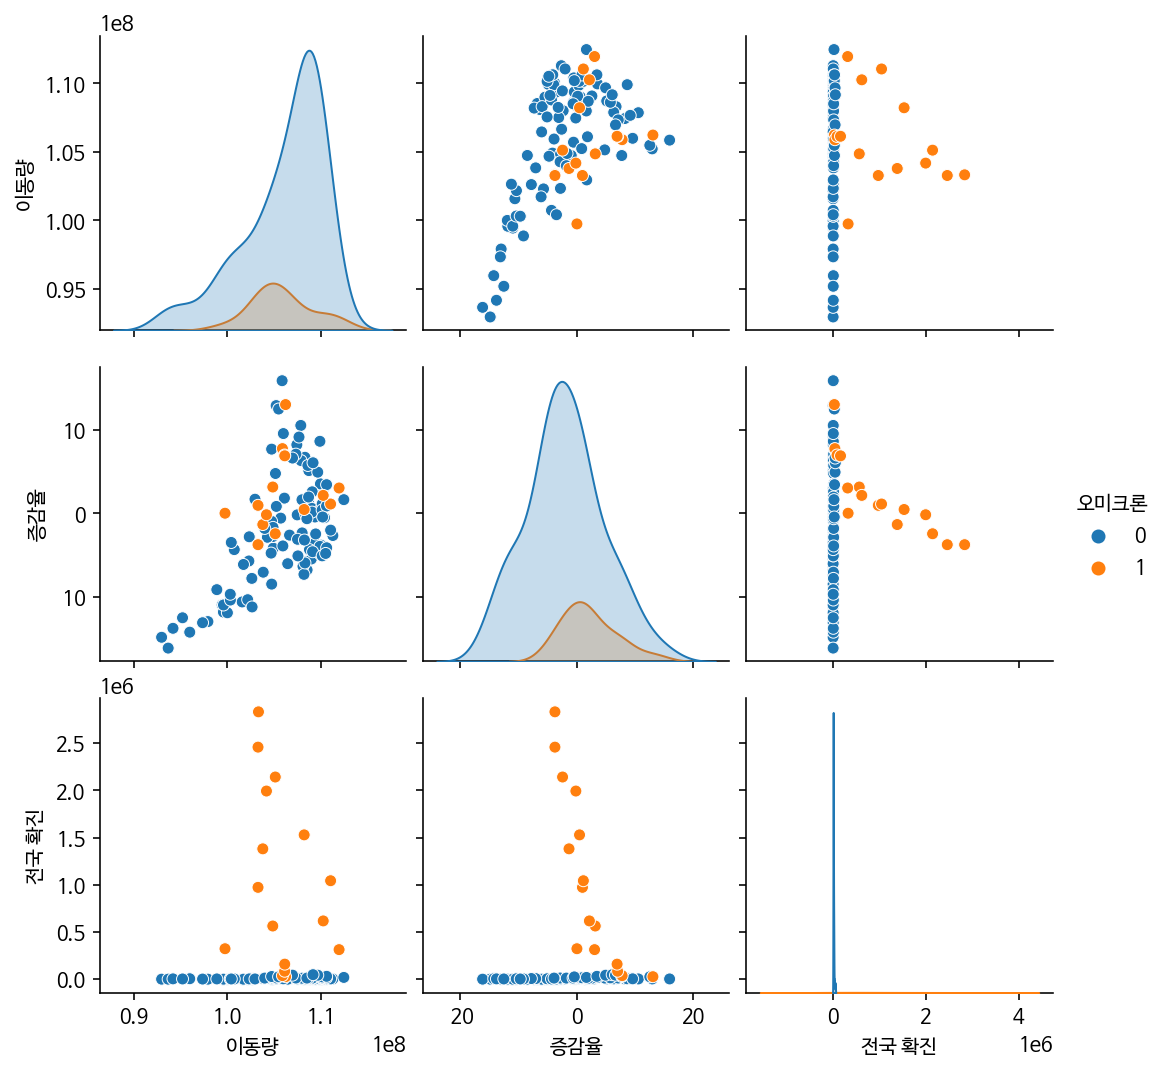

In [55]:
sns.pairplot(dfk, hue = '오미크론')
plt.show()

## 군집 분석

In [57]:
from sklearn.cluster import KMeans

In [82]:
clust_model = KMeans(n_clusters = 2)

clust_model.fit(dfk)

centers = clust_model.cluster_centers_
pred = clust_model.predict(dfk)

print(pd.DataFrame(centers))
print(pred[:10])

              0         1              2         3
0  1.004344e+08 -7.668627  304366.606061  0.181818
1  1.081527e+08  0.897332   82557.755814  0.116279
[1 1 1 1 1 0 0 0 0 0]


In [83]:
clust_df = dfk.copy() 
clust_df['clust'] = pred 
clust_df

,이동량,증감율,전국 확진,오미크론,clust
시기,,,,,
2020.01.3,109202584.0,-0.241176,24,0,1
2020.01.4,108692516.0,1.423529,4,0,1
2020.01.5,104908870.0,-4.164706,405,0,1
2020.02.1,106102789.0,1.841176,2717,0,1
2020.02.2,106653596.0,-2.600000,3617,0,1
...,...,...,...,...,...
2022.03.4,105125050.0,-2.435294,2142204,1,1
2022.03.5,108219978.0,0.476471,1529274,1,1
2022.04.1,111052815.0,1.135294,1043562,1,1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


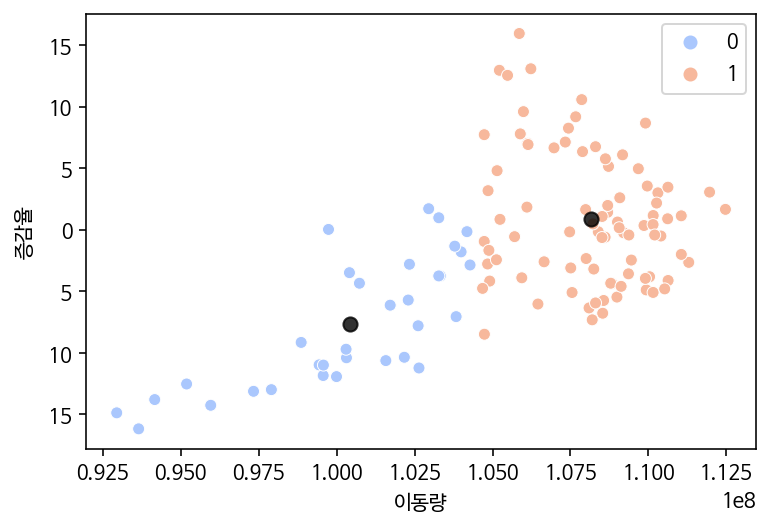

In [84]:
X = clust_df

sns.scatterplot(
    x = X.iloc[:, 0],
    y = X.iloc[:, 1],
    data = dfk,
    hue = clust_model.labels_,
    palette = 'coolwarm'
)
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c = 'black',
    alpha = 0.8,
    s = 50
)

군집화 대실패!!!!